# Importing Required Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
init_notebook_mode(connected=True)

# Reading the data

In [2]:
train = pd.read_csv('train.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
test = pd.read_csv('test.csv')
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
#Removing Duplicate Rows : No duplicate rows found
train = train.drop_duplicates()
print(train.shape)

#Removing Duplicate Rows : No duplicate rows found
test = test.drop_duplicates()
print(test.shape)

(7352, 563)
(2947, 563)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [8]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [9]:
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [11]:
## Finding Null values in the train dataset
train.isnull().sum()
print(train.isnull().sum()[train.isnull().sum()>0])

test.isnull().sum()
print(test.isnull().sum()[test.isnull().sum()>0])

Series([], dtype: int64)
Series([], dtype: int64)


In [12]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [13]:
test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [16]:
# Activity is the target column which has to be pridict
print("train_columns =",train['Activity'].unique())
print("test_columns =",test['Activity'].unique())

train_columns = ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
test_columns = ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [18]:
# Subject is the person ID's
print("train_subject =",train['subject'].unique())
print("test_subject =",test['subject'].unique())

train_subject = [ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
test_subject = [ 2  4  9 10 12 13 18 20 24]


# Checking for class Imbalance

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

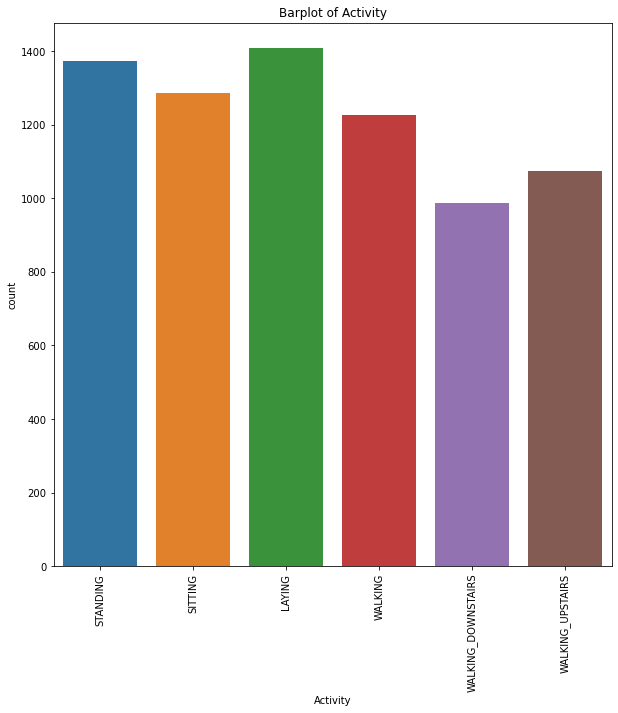

In [19]:
#Bar plot of train activity
plt.figure(figsize=(10,10))
plt.title('Barplot of Activity')
sns.countplot(train.Activity)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

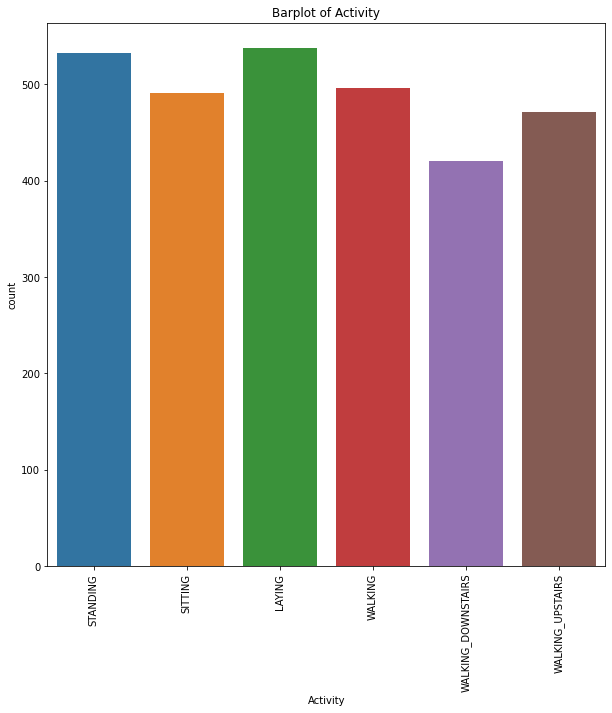

In [20]:
#Bar plot of train activity
plt.figure(figsize=(10,10))
plt.title('Barplot of Activity')
sns.countplot(test.Activity)
plt.xticks(rotation=90)

In [21]:
# plotting the visualization in the train distribution
label_counts = train['Activity'].value_counts()
n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smart Acticity Label Distribution',
                  xaxis = dict(title = 'Activity'),
                  yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout = layout)
iplot(fig)

In [22]:
# plotting the visualization in the train distribution
label_counts = test['Activity'].value_counts()
n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smart Acticity Label Distribution',
                  xaxis = dict(title = 'Activity'),
                  yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout = layout)
iplot(fig)

In [30]:
print("train \n",train['Activity'].value_counts())
print("\n")
print("test :\n",test['Activity'].value_counts())

train 
 LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


test :
 LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64


([<matplotlib.patches.Wedge at 0x28ef08cc4f0>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.137649'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.688792'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.491838'),
  Text(-0.3923524924230064, -0.453937794955933, '16.675735'),
  Text(0.15982683536458778, -0.5783211760754926, '14.594668'),
  Text(0.5475277272492978, -0.24538416390064502, '13.411316')])

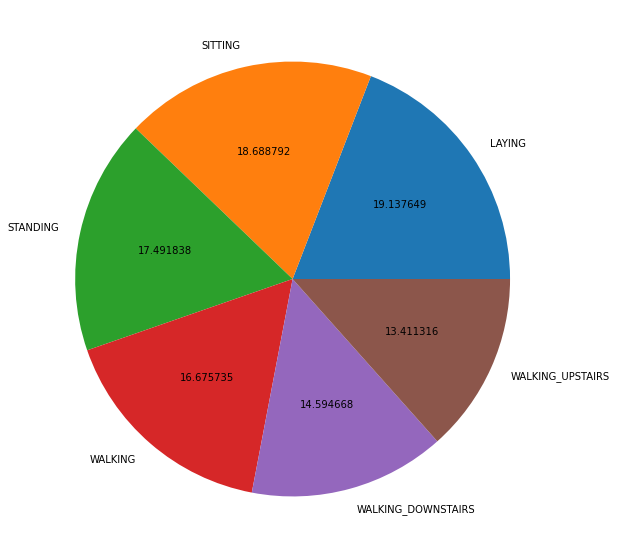

In [31]:
plt.figure(figsize=(10,10))
plt.pie(np.array(train['Activity'].value_counts()), labels = sorted(train['Activity'].unique()), autopct = '%0.6f')

([<matplotlib.patches.Wedge at 0x28ef08ede50>,
 [Text(0.9246289077905214, 0.5958702735311667, 'LAYING'),
  Text(-0.15485784087840757, 1.089045017030278, 'SITTING'),
  Text(-1.0393322592014753, 0.3602616479493165, 'STANDING'),
  Text(-0.8280699520170185, -0.7240857370274139, 'WALKING'),
  Text(0.18960134430378683, -1.0835364923426423, 'WALKING_DOWNSTAIRS'),
  Text(0.9915739703260872, -0.4762153518858462, 'WALKING_UPSTAIRS')],
 [Text(0.5043430406130116, 0.3250201491988182, '18.221921'),
  Text(-0.08446791320640411, 0.5940245547437878, '18.052256'),
  Text(-0.5669085050189865, 0.1965063534268999, '16.830675'),
  Text(-0.45167451928201, -0.3949558565604075, '16.661011'),
  Text(0.10341891507479281, -0.5910199049141684, '15.982355'),
  Text(0.5408585292687748, -0.2597538283013706, '14.251782')])

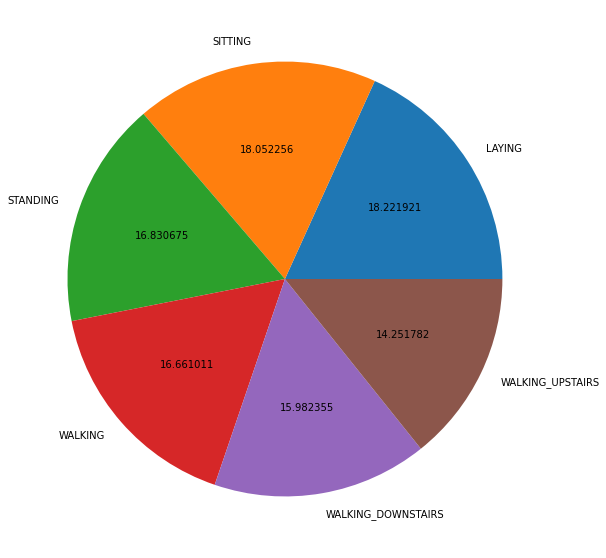

In [32]:
plt.figure(figsize=(10,10))
plt.pie(np.array(test['Activity'].value_counts()), labels = sorted(test['Activity'].unique()), autopct = '%0.6f')

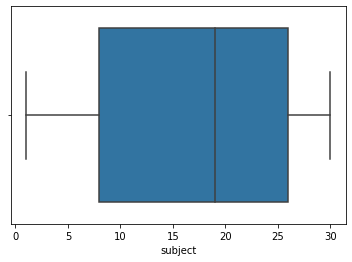

In [34]:
sns.boxplot(train['subject'])

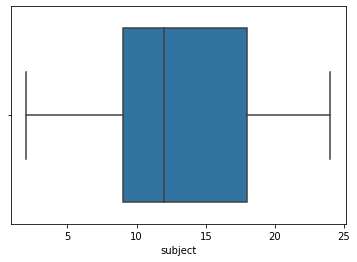

In [35]:
sns.boxplot(test['subject'])

<BarContainer object of 3 artists>

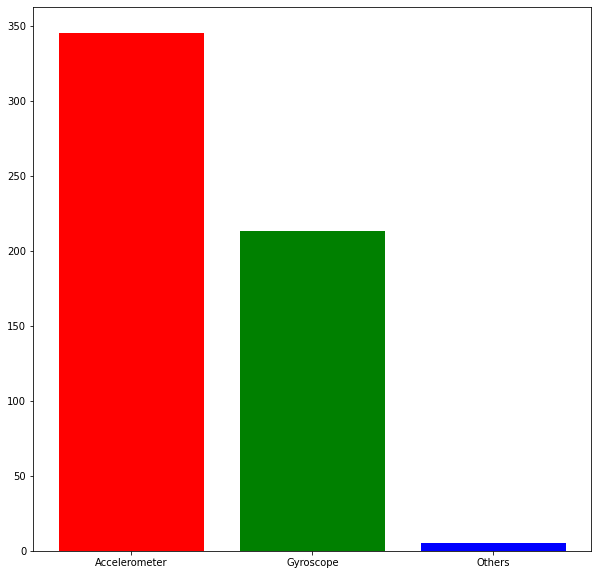

In [36]:
# Type of sensor used to take the data
Acc = 0
Gyro = 0
other = 0

for value in train.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(10,10))
plt.bar(['Accelerometer', 'Gyroscope', 'Others'],[Acc,Gyro,other],color=('r','g','b'))

In [37]:
pd.crosstab(train.subject, train.Activity, margins = True).style.background_gradient(cmap='autumn_r')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


In [38]:
pd.crosstab(test.subject, test.Activity, margins = True).style.background_gradient(cmap='autumn_r')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
2,48,46,54,59,47,48,302
4,54,50,56,60,45,52,317
9,50,50,45,52,42,49,288
10,58,54,44,53,38,47,294
12,60,51,61,50,46,52,320
13,62,49,57,57,47,55,327
18,65,57,73,56,55,58,364
20,68,66,73,51,45,51,354
24,72,68,69,58,55,59,381


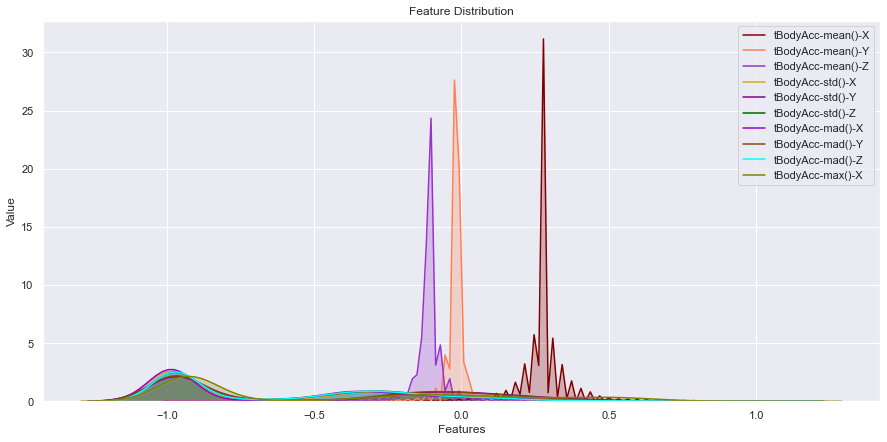

In [39]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[0:10]:
    index = index + 1
    fig = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

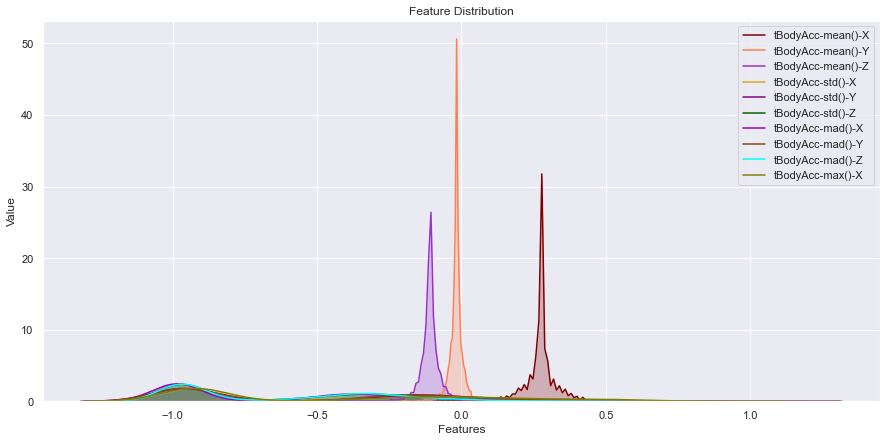

In [40]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[0:10]:
    index = index + 1
    fig = sns.kdeplot(test[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

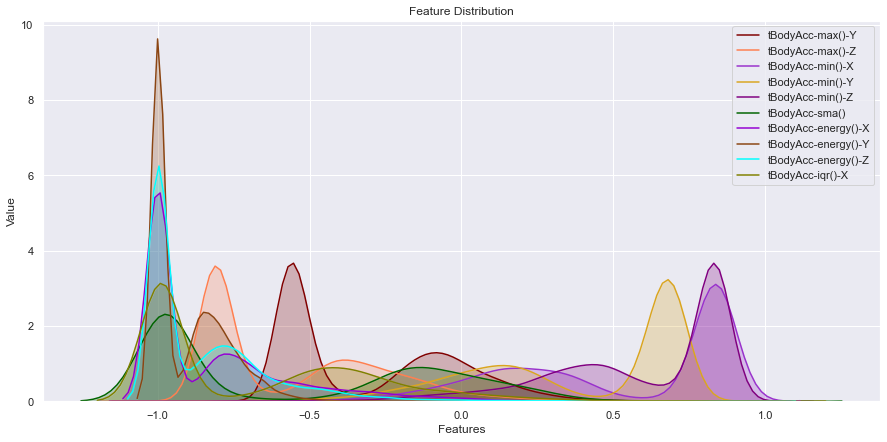

In [41]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[10:20]:
    index = index + 1
    fig = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

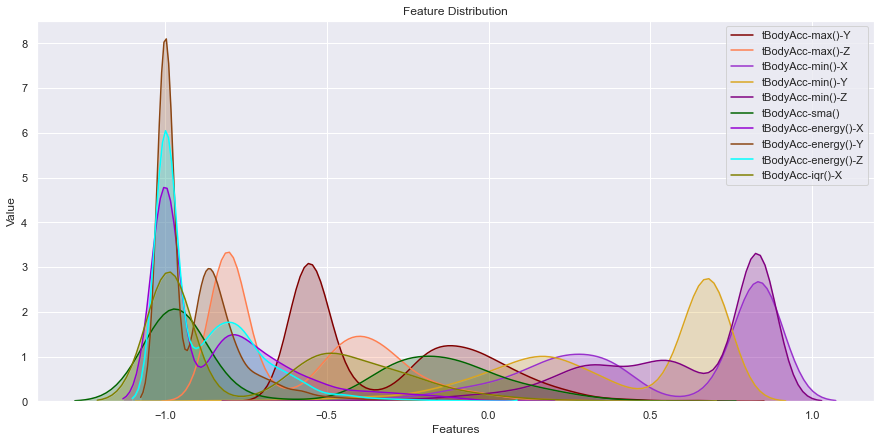

In [42]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[10:20]:
    index = index + 1
    fig = sns.kdeplot(test[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

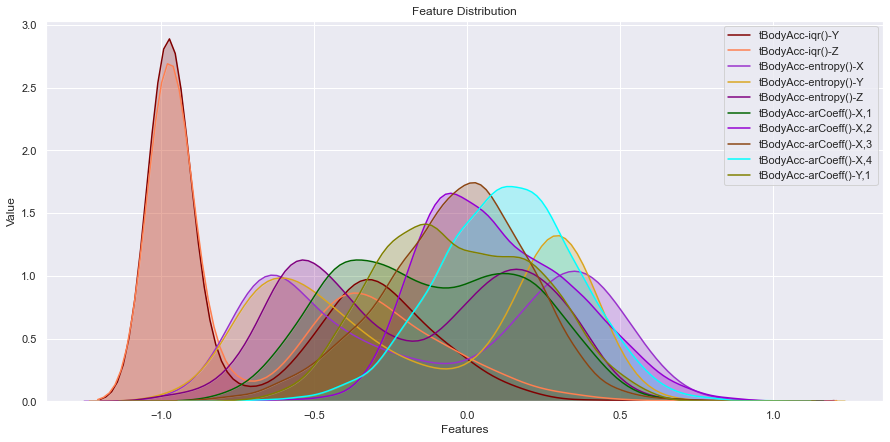

In [43]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[20:30]:
    index = index + 1
    fig = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

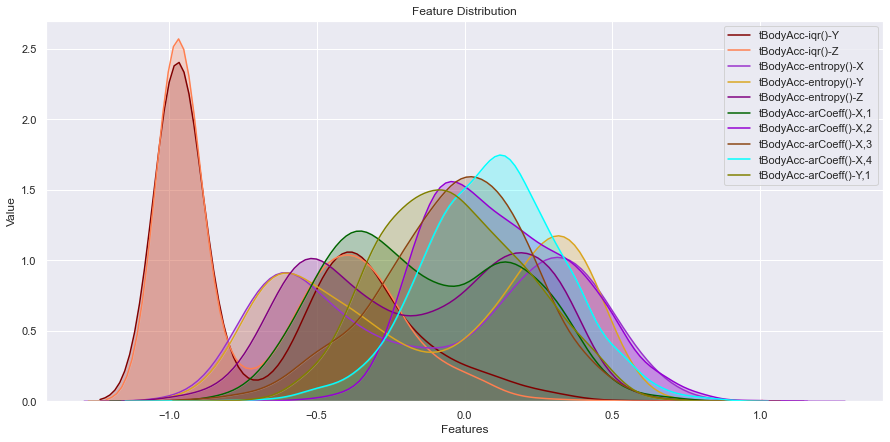

In [44]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[20:30]:
    index = index + 1
    fig = sns.kdeplot(test[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

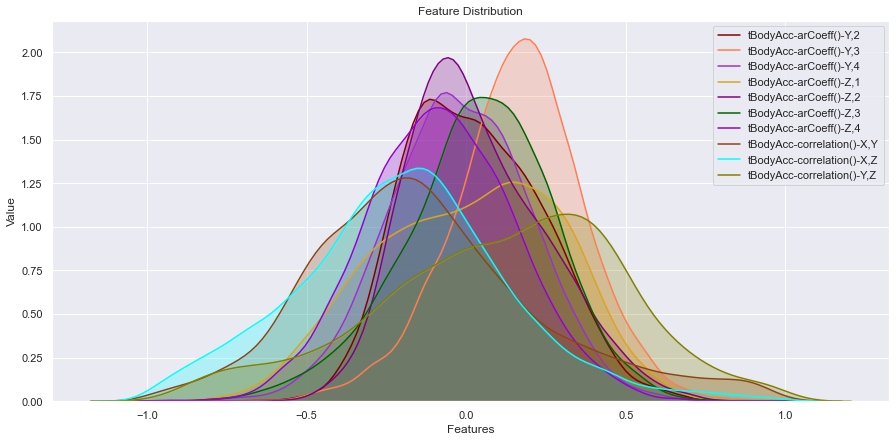

In [45]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[30:40]:
    index = index + 1
    fig = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

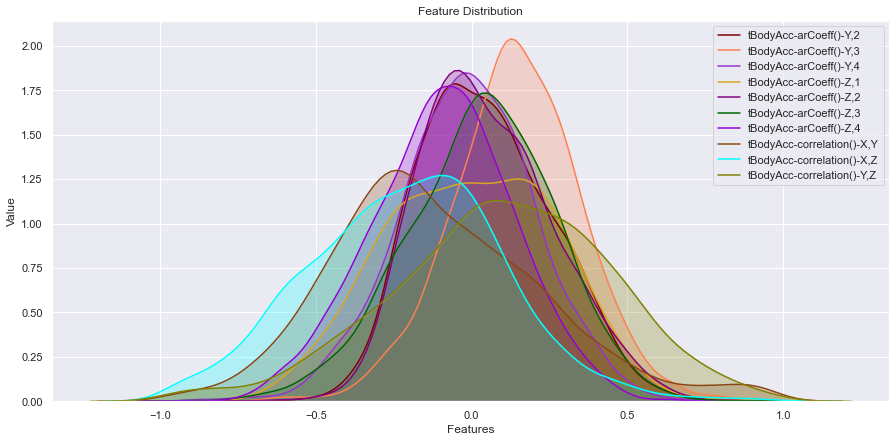

In [46]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[30:40]:
    index = index + 1
    fig = sns.kdeplot(test[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

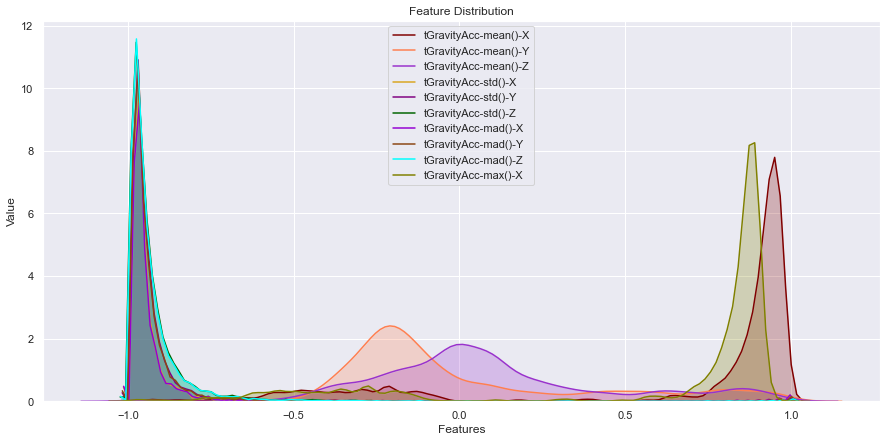

In [47]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[40:50]:
    index = index + 1
    fig = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

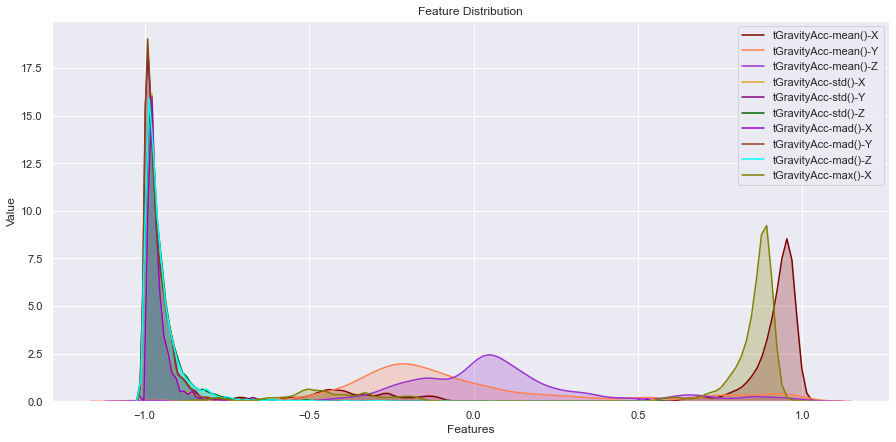

In [48]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[40:50]:
    index = index + 1
    fig = sns.kdeplot(test[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

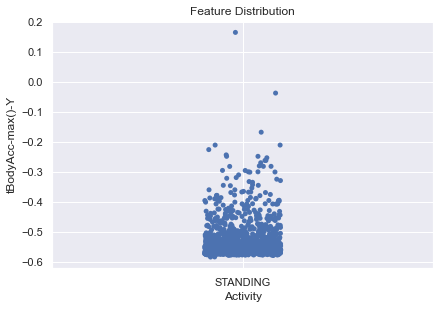

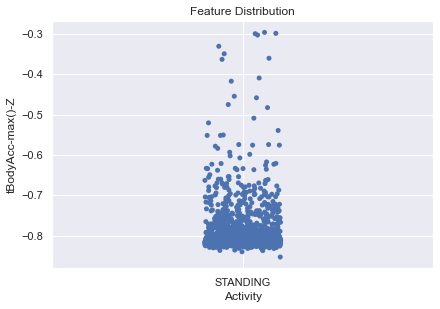

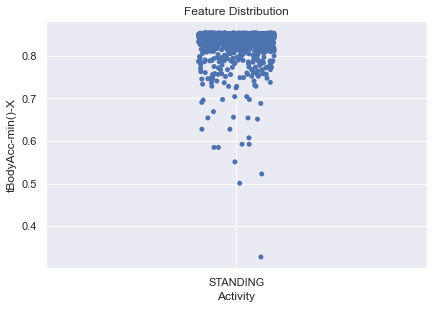

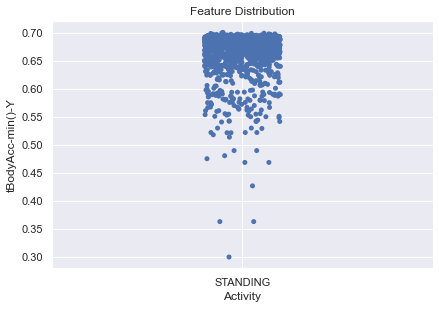

In [49]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(221)
fig1 = sns.stripplot(x='Activity', y= train.loc[train['Activity']=="STANDING"].iloc[:,10], data= train.loc[train['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)
plt.subplot(224)
fig2 = sns.stripplot(x='Activity', y= train.loc[train['Activity']=="STANDING"].iloc[:,11], data= train.loc[train['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(223)
fig2 = sns.stripplot(x='Activity', y= train.loc[train['Activity']=="STANDING"].iloc[:,12], data= train.loc[train['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(222)
fig2 = sns.stripplot(x='Activity', y= train.loc[train['Activity']=="STANDING"].iloc[:,13], data= train.loc[train['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)

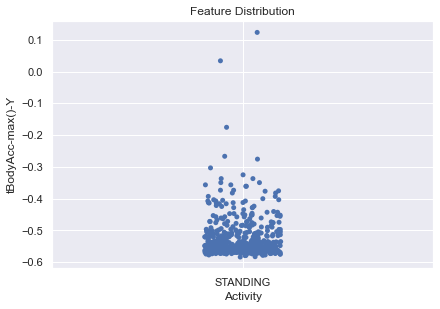

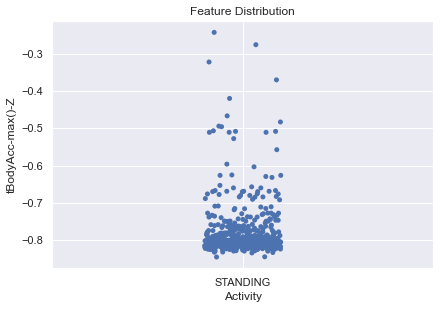

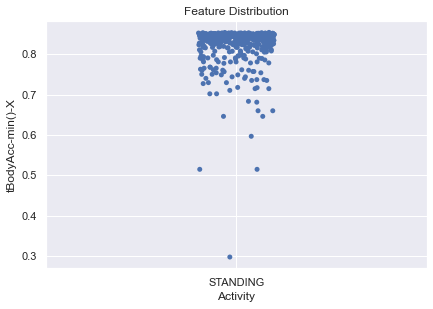

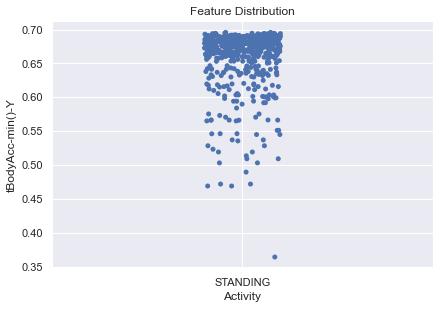

In [50]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(221)
fig1 = sns.stripplot(x='Activity', y= test.loc[test['Activity']=="STANDING"].iloc[:,10], data= test.loc[test['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)
plt.subplot(224)
fig2 = sns.stripplot(x='Activity', y= test.loc[test['Activity']=="STANDING"].iloc[:,11], data= test.loc[test['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(223)
fig2 = sns.stripplot(x='Activity', y= test.loc[test['Activity']=="STANDING"].iloc[:,12], data= test.loc[test['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(222)
fig2 = sns.stripplot(x='Activity', y= test.loc[test['Activity']=="STANDING"].iloc[:,13], data= test.loc[test['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)

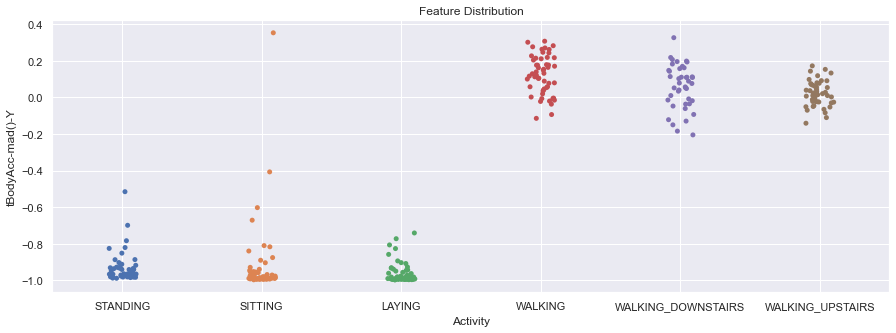

In [51]:
sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='Activity', y= train.loc[train['subject']==15].iloc[:,7], data= train.loc[train['subject']==15], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)

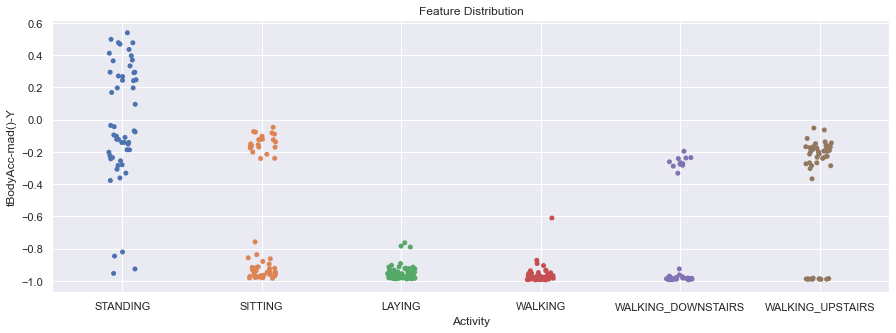

In [52]:
sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='Activity', y= test.loc[train['subject']==15].iloc[:,7], data= train.loc[train['subject']==15], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)

In [53]:
train.dtypes.tail()

angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
dtype: object

In [54]:
test.dtypes.tail()

angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
dtype: object

In [55]:
# Dropping the subject column because it will not affect the dataset
train = train.drop('subject',axis=1)
test = test.drop('subject',axis=1)

# Splitting features and Train and Test data

In [56]:
X_train = train.iloc[:,0:len(train.columns)-1]
Y_train = train.iloc[:,-1]

In [57]:
X_test = train.iloc[:,0:len(train.columns)-1]
Y_test = train.iloc[:,-1]

# Applying label encoder

In [63]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

le = LabelEncoder()
Y_test = le.fit_transform(Y_test)

In [64]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


# Applying PCA

In [142]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

pca.fit(X_train)
pca.fit(X_test)

train_x_pca = pca.transform(X_train)
test_x_pca = pca.transform(X_test)

print(pca.n_components_)
print(pca.explained_variance_)

67
[34.82363041  2.73504627  2.29439284  1.04377529  0.943517    0.7081523
  0.6550526   0.59509008  0.53964712  0.47765287  0.42436828  0.37434592
  0.32255894  0.31056835  0.27774855  0.26439454  0.26008712  0.24027872
  0.23699274  0.22846412  0.21933845  0.20893214  0.19619398  0.18891908
  0.18489952  0.17782383  0.1679984   0.16243337  0.16120162  0.15694728
  0.15403931  0.14663023  0.14212749  0.13130493  0.12840257  0.12450341
  0.12411371  0.11705921  0.11601092  0.11399615  0.10736188  0.105148
  0.10086182  0.09991123  0.09593364  0.08918333  0.08742282  0.08719339
  0.08515727  0.08369953  0.08078604  0.07829341  0.07616958  0.07062093
  0.06959005  0.06665966  0.06575649  0.06401687  0.06295225  0.06105229
  0.05995812  0.05839727  0.05783715  0.05649011  0.05519707  0.05401316
  0.05311405]


In [143]:
ex_variance = np.var(train_x_pca,axis=0)
print(ex_variance)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[34.81889379  2.73467425  2.29408076  1.04363332  0.94338867  0.70805598
  0.6549635   0.59500913  0.53957371  0.4775879   0.42431056  0.374295
  0.32251507  0.31052611  0.27771077  0.26435858  0.26005174  0.24024604
  0.2369605   0.22843305  0.21930862  0.20890372  0.19616729  0.18889338
  0.18487437  0.17779964  0.16797554  0.16241128  0.16117969  0.15692593
  0.15401836  0.14661029  0.14210816  0.13128707  0.1283851   0.12448648
  0.12409682  0.11704328  0.11599514  0.11398065  0.10734727  0.1051337
  0.1008481   0.09989764  0.09592059  0.0891712   0.08741093  0.08718153
  0.08514569  0.08368815  0.08077506  0.07828276  0.07615922  0.07061132
  0.06958059  0.06665059  0.06574755  0.06400817  0.06294369  0.06104399
  0.05994997  0.05838932  0.05782928  0.05648242  0.05518956  0.05400581
  0.05310683]
[0.65814965 0.05169104 0.04336291 0.01972684 0.01783201 0.01338373
 0.01238017 0.01124691 0.01019907 0.00902741 0.00802035 0.00707496
 0.00609621 0.00586959 0.00524931 0.00499693 0.00491

In [140]:
ex_variance = np.var(test_x_pca,axis=0)
print(ex_variance)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[34.81889379  2.73467425  2.29408076  1.04363332  0.94338867  0.70805598
  0.6549635   0.59500913  0.53957371  0.4775879   0.42431056  0.374295
  0.32251507  0.31052611  0.27771077  0.26435858  0.26005174  0.24024604
  0.2369605   0.22843305  0.21930862  0.20890372  0.19616729  0.18889338
  0.18487437  0.17779964  0.16797554  0.16241128  0.16117969  0.15692593
  0.15401836  0.14661029  0.14210816  0.13128707  0.1283851   0.12448648
  0.12409682  0.11704328  0.11599514  0.11398065  0.10734727  0.1051337
  0.1008481   0.09989764  0.09592059  0.0891712   0.08741093  0.08718153
  0.08514569  0.08368815  0.08077506  0.07828276  0.07615922  0.07061132
  0.06958059  0.06665059  0.06574755  0.06400817  0.06294369  0.06104399
  0.05994997  0.05838932  0.05782928  0.05648242  0.05518956  0.05400581
  0.05310683]
[0.65814965 0.05169104 0.04336291 0.01972684 0.01783201 0.01338373
 0.01238017 0.01124691 0.01019907 0.00902741 0.00802035 0.00707496
 0.00609621 0.00586959 0.00524931 0.00499693 0.00491

In [136]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(penalty='l2',solver='lbfgs',class_weight='balanced', max_iter=10000,random_state = 0) 
classifier.fit(train_x_pca, Y_train)
print(Y_train)

[2 2 2 ... 5 5 5]


In [137]:
y_pred = classifier.predict(test_x_pca)
print(test_x_pca)

[[-5.52028030e+00 -2.90277517e-01 -1.52992855e+00 ... -2.16407311e-01
   7.10961538e-01  3.41992873e-01]
 [-5.53534954e+00 -8.25302495e-02 -1.92480428e+00 ... -4.07939904e-01
   1.49304397e-01 -1.16642424e-01]
 [-5.47498801e+00  2.87387051e-01 -2.14464160e+00 ... -1.11954390e-01
   1.84349311e-01  2.01855663e-01]
 ...
 [ 5.85750527e+00 -3.08184349e+00  6.71207302e-01 ... -7.86929514e-02
  -3.86179650e-01  1.04913988e-01]
 [ 5.42109482e+00 -3.42643018e+00  6.71243268e-01 ...  2.06515451e-02
  -4.69618757e-01  7.42460290e-02]
 [ 5.49797027e+00 -2.78992873e+00  5.72224007e-03 ...  1.11532867e-01
  -3.32417431e-01  5.78397814e-02]]


In [162]:
# making confusion matrix between 
#  test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred) 
print (cm)

[[1407    0    0    0    0    0]
 [   0 1202   84    0    0    0]
 [   0   80 1294    0    0    0]
 [   0    0    0 1223    2    1]
 [   0    0    0    1  984    1]
 [   0    0    0    1    1 1071]]


In [163]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test,y_pred))
print("Accuracy:",accuracy_score(Y_test, y_pred)*100)

print(y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1407
           1       0.94      0.93      0.94      1286
           2       0.94      0.94      0.94      1374
           3       1.00      1.00      1.00      1226
           4       1.00      1.00      1.00       986
           5       1.00      1.00      1.00      1073

    accuracy                           0.98      7352
   macro avg       0.98      0.98      0.98      7352
weighted avg       0.98      0.98      0.98      7352

Accuracy: 97.67410228509249
[2 2 2 ... 5 5 5]
